In [1]:
%pip install -r requirements.txt


     |████████████████████████████████| 297 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 17.3 MB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 12.2 MB 12.0 MB/s eta 0:00:01    |██████████████▍                 | 5.5 MB 12.0 MB/s eta 0:00:01███████▊| 12.1 MB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 499 kB 8.0 MB/s eta 0:00:01
     |████████████████████████████████| 9.8 MB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 34.5 MB 5.1 MB/s eta 0:00:01
ERROR: launchpadlib 1.10.13 requires testresources, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import confusion_matrix

In [6]:
data = pd.read_csv('student_data.csv')

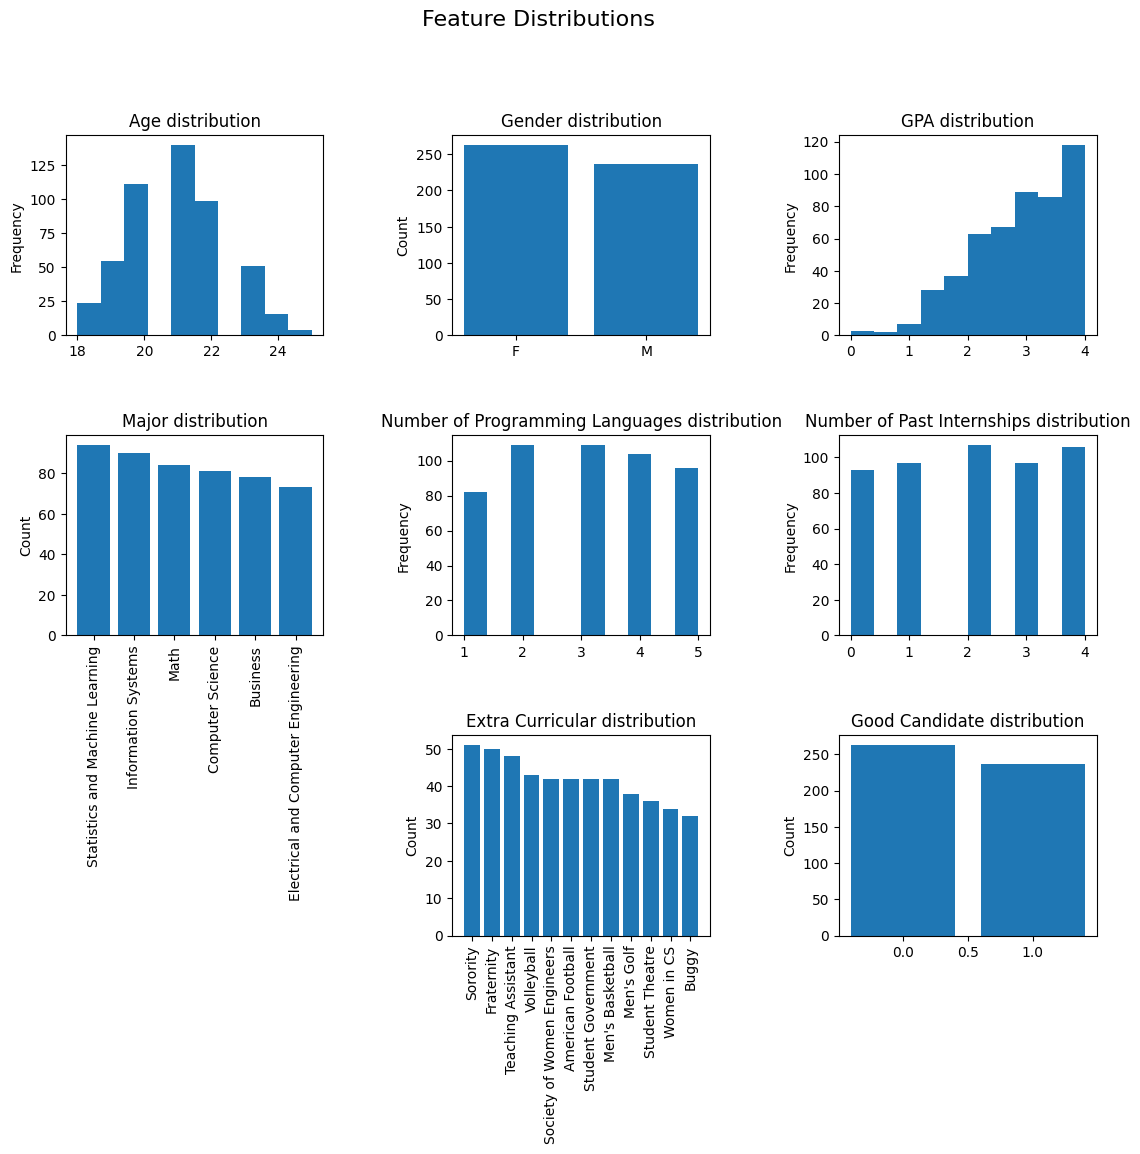

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12), sharex=False)

# Set the size of the first subplot to be larger
axs[0, 0].set_position([0.1, 0.5, 0.4, 0.4])

# Set the size of the second subplot to be smaller
axs[0, 1].set_position([0.6, 0.5, 0.2, 0.4])

# Plot histogram for 'Age'
axs[0, 0].hist(data['Age'])
axs[0, 0].set_title('Age distribution')
axs[0, 0].set_ylabel('Frequency')

# Plot bar chart for 'Gender'
axs[0, 1].bar(data['Gender'].unique(), data['Gender'].value_counts())
axs[0, 1].set_title('Gender distribution')
axs[0, 1].set_ylabel('Count')

# Plot histogram for 'GPA'
axs[0, 2].hist(data['GPA'])
axs[0, 2].set_title('GPA distribution')
axs[0, 2].set_ylabel('Frequency')

# Plot bar chart for 'Major'
axs[1, 0].bar(data['Major'].unique(), data['Major'].value_counts())
axs[1, 0].set_title('Major distribution')
axs[1, 0].set_ylabel('Count')
axs[1, 0].tick_params(axis='x', labelrotation=90)

# Plot histogram for 'Num Programming Languages'
axs[1, 1].hist(data['Num Programming Languages'])
axs[1, 1].set_title('Number of Programming Languages distribution')
axs[1, 1].set_ylabel('Frequency')

# Plot histogram for 'Num Past Internships'
axs[1, 2].hist(data['Num Past Internships'])
axs[1, 2].set_title('Number of Past Internships distribution')
axs[1, 2].set_ylabel('Frequency')

# Plot bar chart for 'Extra Curricular'
axs[2, 1].bar(data['Extra Curricular'].unique(), data['Extra Curricular'].value_counts())
axs[2, 1].set_title('Extra Curricular distribution')
axs[2, 1].set_ylabel('Count')
axs[2, 1].tick_params(axis='x', labelrotation=90)

# Plot bar chart for 'Good Candidate'
axs[2, 2].bar(data['Good Candidate'].unique(), data['Good Candidate'].value_counts())
axs[2, 2].set_title('Good Candidate distribution')
axs[2, 2].set_ylabel('Count')

# Hide the last subplot
axs[2, 0].axis('off')

# Set overall figure title and layout
fig.suptitle('Feature Distributions', fontsize=16)
fig.tight_layout(pad=3.0)

# Adjust spacing between subplots and size of the figure
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Display the figure
plt.show()

In [8]:
model = joblib.load('./model.pkl')

y_true = data['Good Candidate']
data_unknown = data.drop('Good Candidate', axis=1)
y_pred = model.predict(data_unknown)

In [9]:
accuracy = sum(y_true == y_pred) / len(y_true)
accuracy

0.832

In [10]:
conf_mat = confusion_matrix(y_true, y_pred, labels=[0, 1])
conf_mat

array([[221,  42],
       [ 42, 195]])

# Group Unaware

In [11]:
from sklearn.metrics import accuracy_score
try:
  data_no_gender = data_unknown.drop(['Gender'], axis=1)
  y_pred_no_gender = model.predict(data_no_gender)
  print('Accuracy w/o gender:', accuracy_score(y_pred_no_gender, y_true))
except ValueError:
  print('Gender is used in the model')

try:
  data_no_age = data_unknown.drop(['Age'], axis=1)
  y_pred_no_age = model.predict(data_no_age)
  print('Accuracy w/o age:', accuracy_score(y_pred_no_age, y_true))
except ValueError:
  print('Age is used in the model')

Accuracy w/o gender: 0.832
Age is used in the model


# Demographic Parity

In [22]:
data_m = data.loc[data['Gender'] == 'M']
y_pred_m = model.predict(data_m)
y_true_m = data_m['Good Candidate']
print("Accuracy (M):", sum(y_true_m == y_pred_m) / len(y_true_m))

data_f = data.loc[data['Gender'] == 'F']
y_pred_f = model.predict(data_f)
y_true_f = data_f['Good Candidate']
print("Accuracy (F):", sum(y_true_f == y_pred_f) / len(y_true_f))

Accuracy (M): 0.7890295358649789
Accuracy (F): 0.870722433460076
